In [1]:
!pip install kaggle

In [2]:
!mkdir /root/.kaggle/  

In [4]:
!cp /content/drive/MyDrive/KEY/kaggle.json /root/.kaggle/   

In [5]:
!kaggle datasets download -d trolukovich/food11-image-dataset

100% 1.08G/1.08G [00:07<00:00, 157MB/s]
100% 1.08G/1.08G [00:07<00:00, 148MB/s]


In [6]:
!unzip -d /content/Food11_dataset/ /content/food11-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: /content/Food11_dataset/training/Soup/223.jpg  
  inflating: /content/Food11_dataset/training/Soup/224.jpg  
  inflating: /content/Food11_dataset/training/Soup/225.jpg  
  inflating: /content/Food11_dataset/training/Soup/226.jpg  
  inflating: /content/Food11_dataset/training/Soup/227.jpg  
  inflating: /content/Food11_dataset/training/Soup/228.jpg  
  inflating: /content/Food11_dataset/training/Soup/229.jpg  
  inflating: /content/Food11_dataset/training/Soup/23.jpg  
  inflating: /content/Food11_dataset/training/Soup/230.jpg  
  inflating: /content/Food11_dataset/training/Soup/231.jpg  
  inflating: /content/Food11_dataset/training/Soup/232.jpg  
  inflating: /content/Food11_dataset/training/Soup/233.jpg  
  inflating: /content/Food11_dataset/training/Soup/234.jpg  
  inflating: /content/Food11_dataset/training/Soup/235.jpg  
  inflating: /content/Food11_dataset/training/Soup/236.jpg  
  inflating: /content/Food11_datase

# Importing libararies

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import plotly.express as px
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator

In [8]:
from keras.models import Input,Model
from keras.layers import Dense,Activation,Dropout,Flatten,MaxPool2D,Conv2D
from keras.applications.inception_v3 import InceptionV3,preprocess_input,decode_predictions

# Preprocessing Training set

In [9]:
train_datagen=ImageDataGenerator(rescale=1./255,horizontal_flip=True,rotation_range=20,
                                 height_shift_range=0.1,width_shift_range=0.1,
                                 shear_range=0.2,zoom_range=0.2)

training_set=train_datagen.flow_from_directory('/content/Food11_dataset/training',target_size=(256,256),class_mode='categorical',
                                               batch_size=32,shuffle=True)

Found 9866 images belonging to 11 classes.


# Preprocessing Test set

In [10]:
test_datagen=ImageDataGenerator(rescale=1./255)

test_set=test_datagen.flow_from_directory('/content/Food11_dataset/evaluation',
                                          target_size=(256,256),class_mode='categorical',
                                          batch_size=32,shuffle=True)

Found 3347 images belonging to 11 classes.


# Lets,look how ur dataset looks like

In [11]:
from keras.preprocessing import image
import matplotlib.image as img

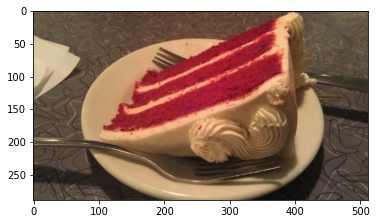

In [12]:
path1='/content/Food11_dataset/validation/Dessert/98.jpg'
plt.imshow(img.imread(path1))

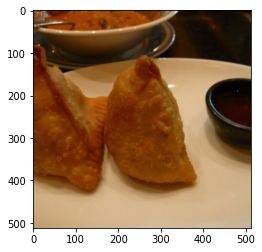

In [13]:
path2='/content/Food11_dataset/validation/Fried food/108.jpg'
plt.imshow(img.imread(path2))

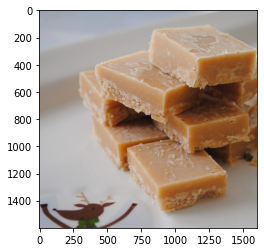

In [14]:
path3='/content/Food11_dataset/validation/Dairy product/109.jpg'
plt.imshow(img.imread(path3))

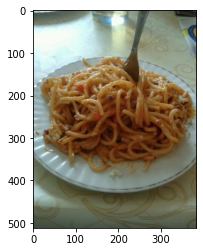

In [15]:
path4='/content/Food11_dataset/validation/Noodles-Pasta/121.jpg'
plt.imshow(img.imread(path4))

# Making CNN Architecture

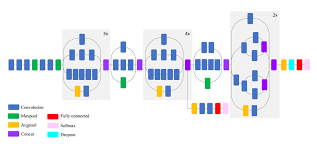

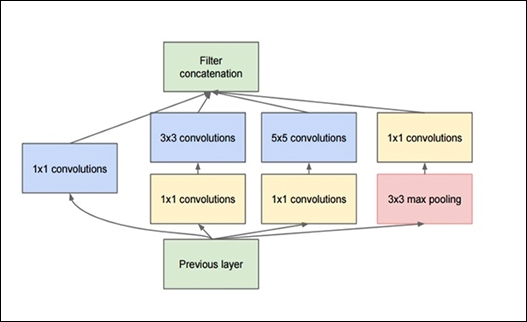

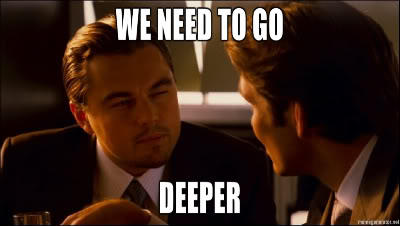

In [16]:
ptm=InceptionV3(input_shape=(256,256,3),weights='imagenet',include_top=False)
for layer in ptm.layers:
    layer.trainable = False

87916544/87910968 [==============================] - 1s 0us/step


In [17]:
flat=Flatten()(ptm.output)
out=Dense(units=11,activation='softmax')(flat)
model=Model(inputs=ptm.input,outputs=out)

In [22]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
checkpoint = ModelCheckpoint('InceptionV3_model.h5', verbose=1, save_best_only=True)

# Compiling the model

In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [20]:
tf.keras.utils.plot_model(model=model,to_file='inception_archi.png',show_shapes=True)

# Training the model

In [23]:
model.fit(x=training_set,validation_data=test_set,epochs=40,callbacks=checkpoint)

Epoch 1/40
309/309 [==============================] - 228s 621ms/step - loss: 7.1961 - accuracy: 0.5916 - val_loss: 3.9551 - val_accuracy: 0.7395

Epoch 00001: val_loss improved from inf to 3.95515, saving model to InceptionV3_model.h5
Epoch 2/40
309/309 [==============================] - 189s 613ms/step - loss: 3.6506 - accuracy: 0.7518 - val_loss: 4.1002 - val_accuracy: 0.7807

Epoch 00002: val_loss did not improve from 3.95515
Epoch 3/40
309/309 [==============================] - 189s 612ms/step - loss: 3.4578 - accuracy: 0.7941 - val_loss: 4.1453 - val_accuracy: 0.7849

Epoch 00003: val_loss did not improve from 3.95515
Epoch 4/40
309/309 [==============================] - 188s 611ms/step - loss: 3.7900 - accuracy: 0.7972 - val_loss: 5.6137 - val_accuracy: 0.7750

Epoch 00004: val_loss did not improve from 3.95515
Epoch 5/40
309/309 [==============================] - 188s 609ms/step - loss: 3.7691 - accuracy: 0.8082 - val_loss: 5.3457 - val_accuracy: 0.7867

Epoch 00005: val_loss d

# **Saving the model**

In [49]:

from keras.models import load_model
model.save("network.h5")

In [24]:
metrics=pd.DataFrame(model.history.history)

In [25]:
metrics

loss  accuracy  val_loss  val_accuracy
0   4.722395  0.681533  3.955149      0.739468
1   4.150948  0.748125  4.100197      0.780699
2   3.995005  0.787756  4.145322      0.784882
3   3.936991  0.799615  5.613657      0.775022
4   3.890523  0.809548  5.345713      0.786675
5   3.647336  0.824346  4.513957      0.812070
6   3.813938  0.828097  6.469295      0.775022
7   3.439097  0.843402  4.973052      0.816552
8   3.304966  0.848165  5.547358      0.804004
9   3.644679  0.841476  5.057181      0.821034
10  3.706685  0.851308  4.835382      0.824022
11  3.413944  0.858301  6.127968      0.807888
12  3.270397  0.859923  6.147459      0.813564
13  3.044374  0.868842  6.099951      0.815058
14  3.330542  0.862761  5.254811      0.831192
15  2.918993  0.879992  5.713925      0.826113
16  3.206783  0.871376  6.934592      0.814162
17  3.481179  0.869045  7.820944      0.806394
18  3.033415  0.880195  8.001193      0.812967
19  3.017841  0.880397  9.611420      0.781894
20  2.958767  0.884654  6.991449      0.827308
21  3.226522  0.881918  7.196869      0.821034
22  2.998222  0.888101  6.487885      0.832686
23  2.931975  0.890939  6.020615      0.837765
24  2.872451  0.890432  6.530942      0.838064
25  2.732253  0.900162  7.328969      0.819839
26  2.987082  0.890533  6.729037      0.838661
27  2.579061  0.901987  8.548518      0.799821
28  3.257923  0.889418  7.117255      0.824022
29  2.672673  0.900264  6.882768      0.830893
30  3.002609  0.894790  7.755302      0.826113
31  3.001152  0.895196  9.115360      0.804601
32  2.880025  0.904014  8.224247      0.819839
33  2.725839  0.904014  7.768821      0.827009
34  2.847276  0.903912  7.342022      0.825515
35  2.496654  0.912325  7.982810      0.819839
36  2.719479  0.911818  7.654313      0.835076
37  2.703233  0.910906  8.153970      0.832387
38  2.849480  0.904723  9.160085      0.812668
39  2.541740  0.910703  7.622397      0.826710

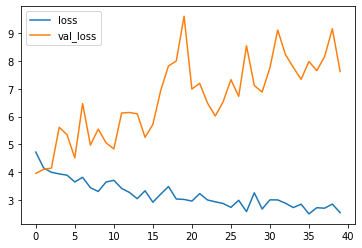

In [51]:
metrics[['loss','val_loss']].plot()

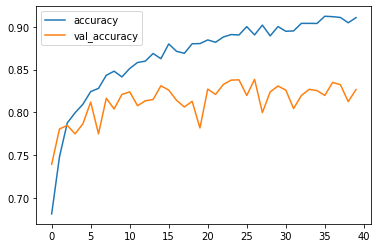

In [27]:
metrics[['accuracy','val_accuracy']].plot()

In [28]:
training_set.class_indices

{'Bread': 0,
 'Dairy product': 1,
 'Dessert': 2,
 'Egg': 3,
 'Fried food': 4,
 'Meat': 5,
 'Noodles-Pasta': 6,
 'Rice': 7,
 'Seafood': 8,
 'Soup': 9,
 'Vegetable-Fruit': 10}

In [29]:
dct=training_set.class_indices
dct

{'Bread': 0,
 'Dairy product': 1,
 'Dessert': 2,
 'Egg': 3,
 'Fried food': 4,
 'Meat': 5,
 'Noodles-Pasta': 6,
 'Rice': 7,
 'Seafood': 8,
 'Soup': 9,
 'Vegetable-Fruit': 10}

In [30]:
lst=[]
for x in dct.keys():
  lst.append(x)


In [31]:
lst

['Bread',
 'Dairy product',
 'Dessert',
 'Egg',
 'Fried food',
 'Meat',
 'Noodles-Pasta',
 'Rice',
 'Seafood',
 'Soup',
 'Vegetable-Fruit']

# **Results**

In [40]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np




1.   Test Case-1




Model Prediction=> Dessert


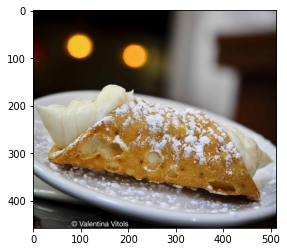

In [45]:
img_path='/content/Food11_dataset/validation/Dessert/184.jpg'
img = image.load_img(img_path, target_size=(256,256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


result=model.predict(x)
res=lst[np.argmax(result)]

print("Model Prediction=>",res)
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)



2.   **Test Case-2**




Model Prediction=> Seafood


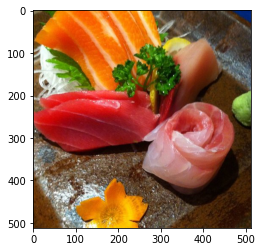

In [44]:


img_path = '/content/Food11_dataset/validation/Seafood/220.jpg'
img = image.load_img(img_path, target_size=(256,256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


result=model.predict(x)
res=lst[np.argmax(result)]

print("Model Prediction=>",res)
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)



3. **Test Case-3**   




Model Prediction=> Egg


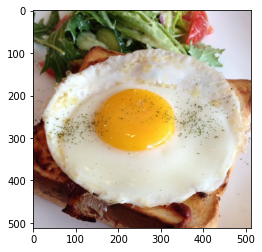

In [46]:


img_path = '/content/Food11_dataset/validation/Egg/103.jpg'
img = image.load_img(img_path, target_size=(256,256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

result=model.predict(x)
res=lst[np.argmax(result)]

print("Model Prediction=>",res)
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)

4. **Test Case-4**

Model Prediction=> Dessert


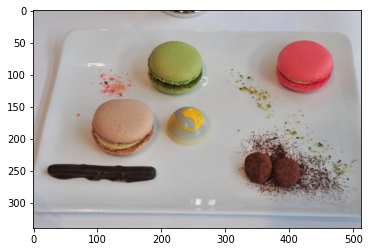

In [43]:


img_path = '/content/Food11_dataset/validation/Dessert/10.jpg'
img = image.load_img(img_path, target_size=(256,256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


result=model.predict(x)
res=lst[np.argmax(result)]

print("Model Prediction=>",res)
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)

5. **Test Case-5**

Model Prediction=> Fried food


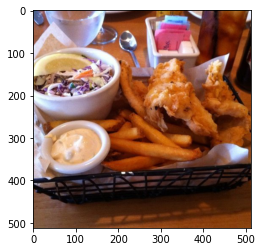

In [47]:
img_path = '/content/Food11_dataset/validation/Fried food/321.jpg'
img = image.load_img(img_path, target_size=(256,256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


result=model.predict(x)
res=lst[np.argmax(result)]

print("Model Prediction=>",res)
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)